Objective of this work is to predict recipes that will lead to high traffic and build model that will correctly predict high traffic recipes 80% of the time.
The process in this notebook will start with data validity through actions such as removing duplicates, addressing missing values, and adjusting the data types of dataframe columns. 
The next stage is data exploration to extract insights, which will help to construct a suitable machine learning model. Accuracy metrics will be used to assess performance of the model as well as compare with the alternative machine learning model.
Final step is alignment of the analysis solution with business metrics and providing recommendations for the company to succeed in business.

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data cleaning and validation

In [2]:
# read provided data file and convert it into dataframe
recipe_df = pd.read_csv("recipe_site_traffic_2212.csv")

# review first 5 rows of the dataframe
recipe_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
#Check the number of duplicated recipes
recipe_df.duplicated(subset='recipe').sum()

0

In [4]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


Given that no duplicates were detected in "recipe" column, removal of the rows is not necessary. 
The next step as shown above was to check data types of the dataframes. The "servings" column draws immediate attention since its data type is object yet by checking the first five rows, we can see that column contains numeric data type. To validate the data in this column, we will check counts to assess for presence of any object / categorical data type. 

In [5]:
recipe_df["servings"].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [6]:
#"as a snack" will need to be replaced with their relevant numeric number
recipe_df['servings'] = recipe_df['servings'].str.replace(" as a snack", "")

#checking the values of servings column again
recipe_df['servings'].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

In [7]:
#converting data type of servings column to integer
recipe_df['servings'] = recipe_df['servings'].astype('int64')

In [8]:
recipe_df['high_traffic'].value_counts()

high_traffic
High    574
Name: count, dtype: int64

Column "high_traffic" contains only rows with "High" string and the rest are null values. Data in this column suppose to show when the traffic is high or low. Intent is to replace High with True and null values with False to show whether traffic is truely high or it is actually low. 

In [9]:
#replacing the rows with value "High" with True, and null values with False
recipe_df['high_traffic'] = np.where(recipe_df['high_traffic'] == "High", True, False)

#checking the values of high_traffic column again
recipe_df['high_traffic'].value_counts()

high_traffic
True     574
False    373
Name: count, dtype: int64

In [10]:
#checking the values of category column
recipe_df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

As per task instruction, the "category" column should contain "Chicken" type of recipe instead of "Chicken Breast" as per code line above. This observation means that we need to replace "Breast" string to ensure that only "Chicken" is displayed as a type of recipe. 

In [11]:
#replacing the rows including " Breast" with their relevant numeric number
recipe_df['category'] = recipe_df['category'].str.replace(" Breast", "")

#checking the values of servings column again
recipe_df['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

In [12]:
#converting data type of category column to category
recipe_df['category'] = recipe_df['category'].astype('category')

In [13]:
#checking the summary of dataframe's structure
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [14]:
#Check for missing values in the dataframe
recipe_df.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [15]:
#dropping missing values
recipe_df = recipe_df.dropna().reset_index(drop=True)

#Check for missing values in the dataframe
recipe_df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

# Exploratory Data Analysis

With the completion of data validation and cleaning, the dataframe is now prepared for exploratory analysis.
Moving forward, we can compute descriptive statistics for each numerical column within the dataframe. 
This process will provide valuable insights into the characteristics of the data.

In [16]:
#generating descriptive statistic for each columns
recipe_df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


Analyzing the descriptive statistics, it's evident that there is a notable standard deviation, particularly in columns related to calories and nutritional components.
The quantile values indicate the presence of outliers, contributing to skewness in the distribution.

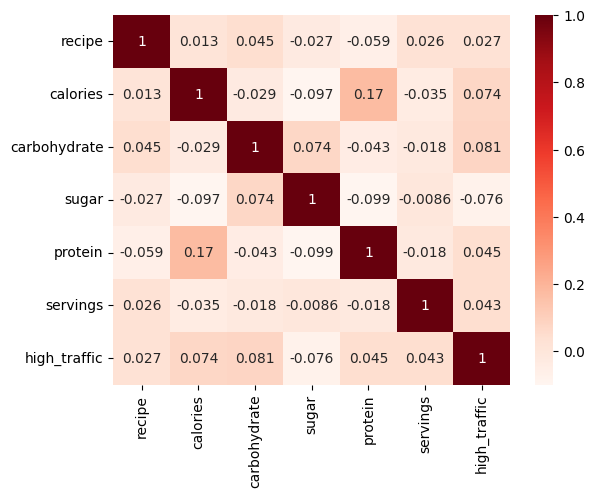

In [17]:
# checking correlation between numerical columns 

recipe_df[['recipe', 'calories', 'carbohydrate','sugar', 'protein', 'servings', 'high_traffic']].corr()

sns.heatmap(recipe_df[['recipe', 'calories', 'carbohydrate','sugar', 'protein', 'servings', 'high_traffic']].corr(), annot=True, cmap = 'Reds')
plt.show()

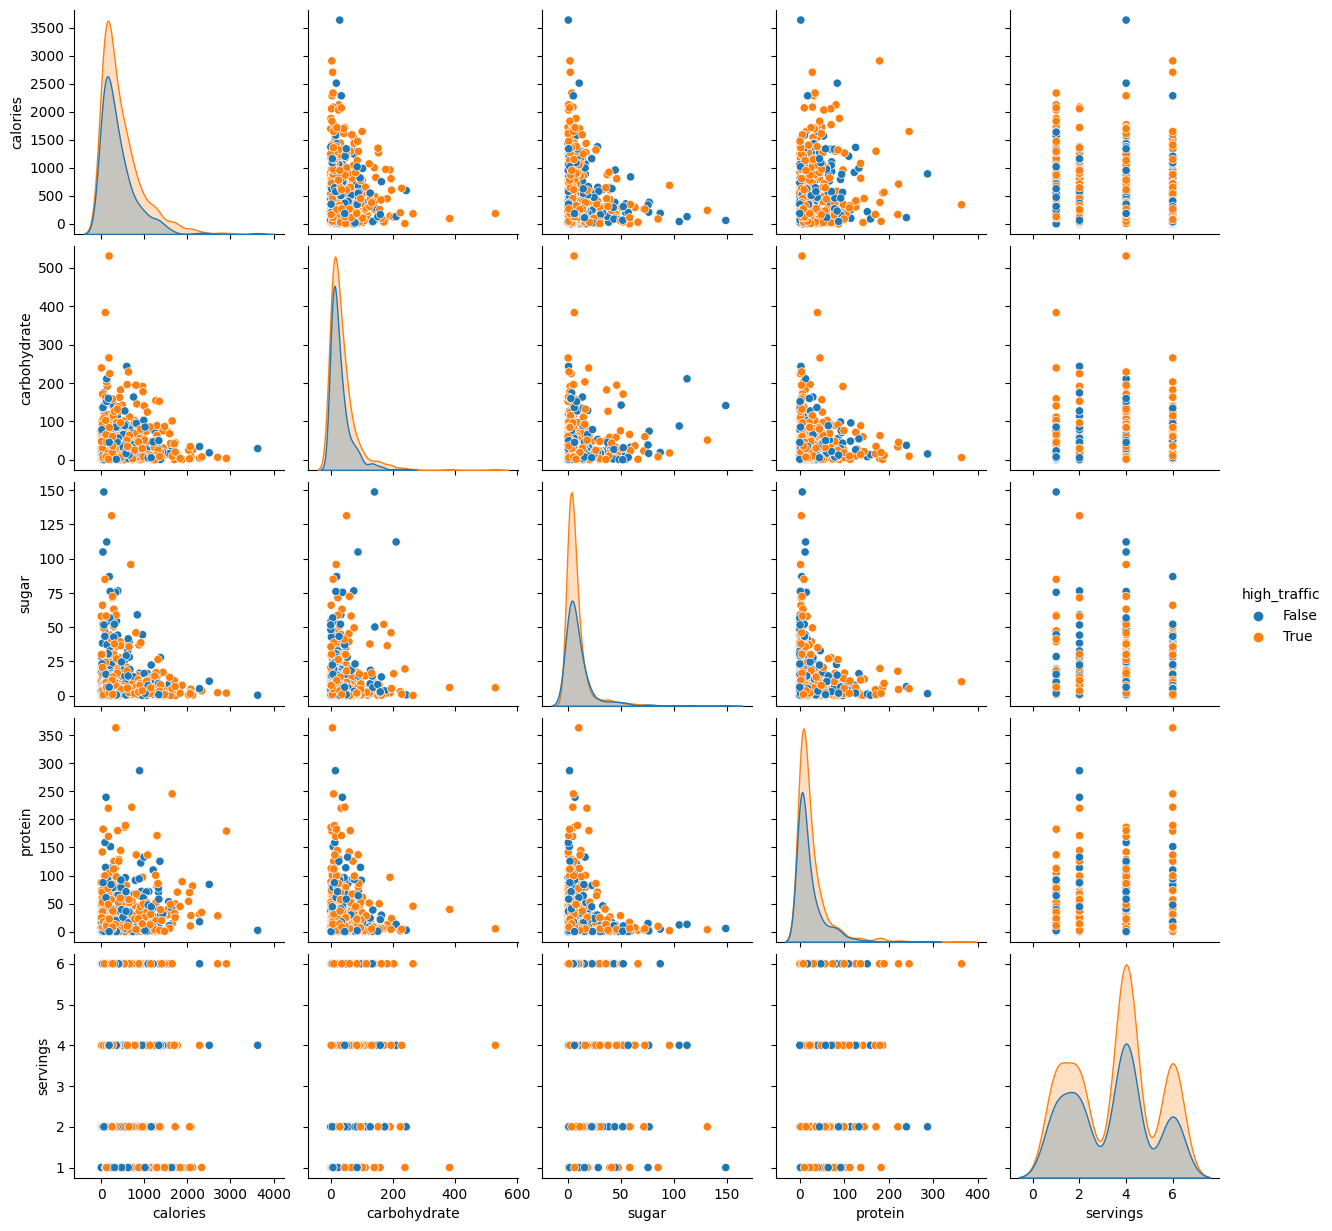

In [18]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(recipe_df[filtered_columns], hue='high_traffic')
plt.show()

Based on heatmap and pairplot, poor correlation between all column is evident.

The next step is to plot histogram to visualise distribution of the columns and assess skewness of the data. 

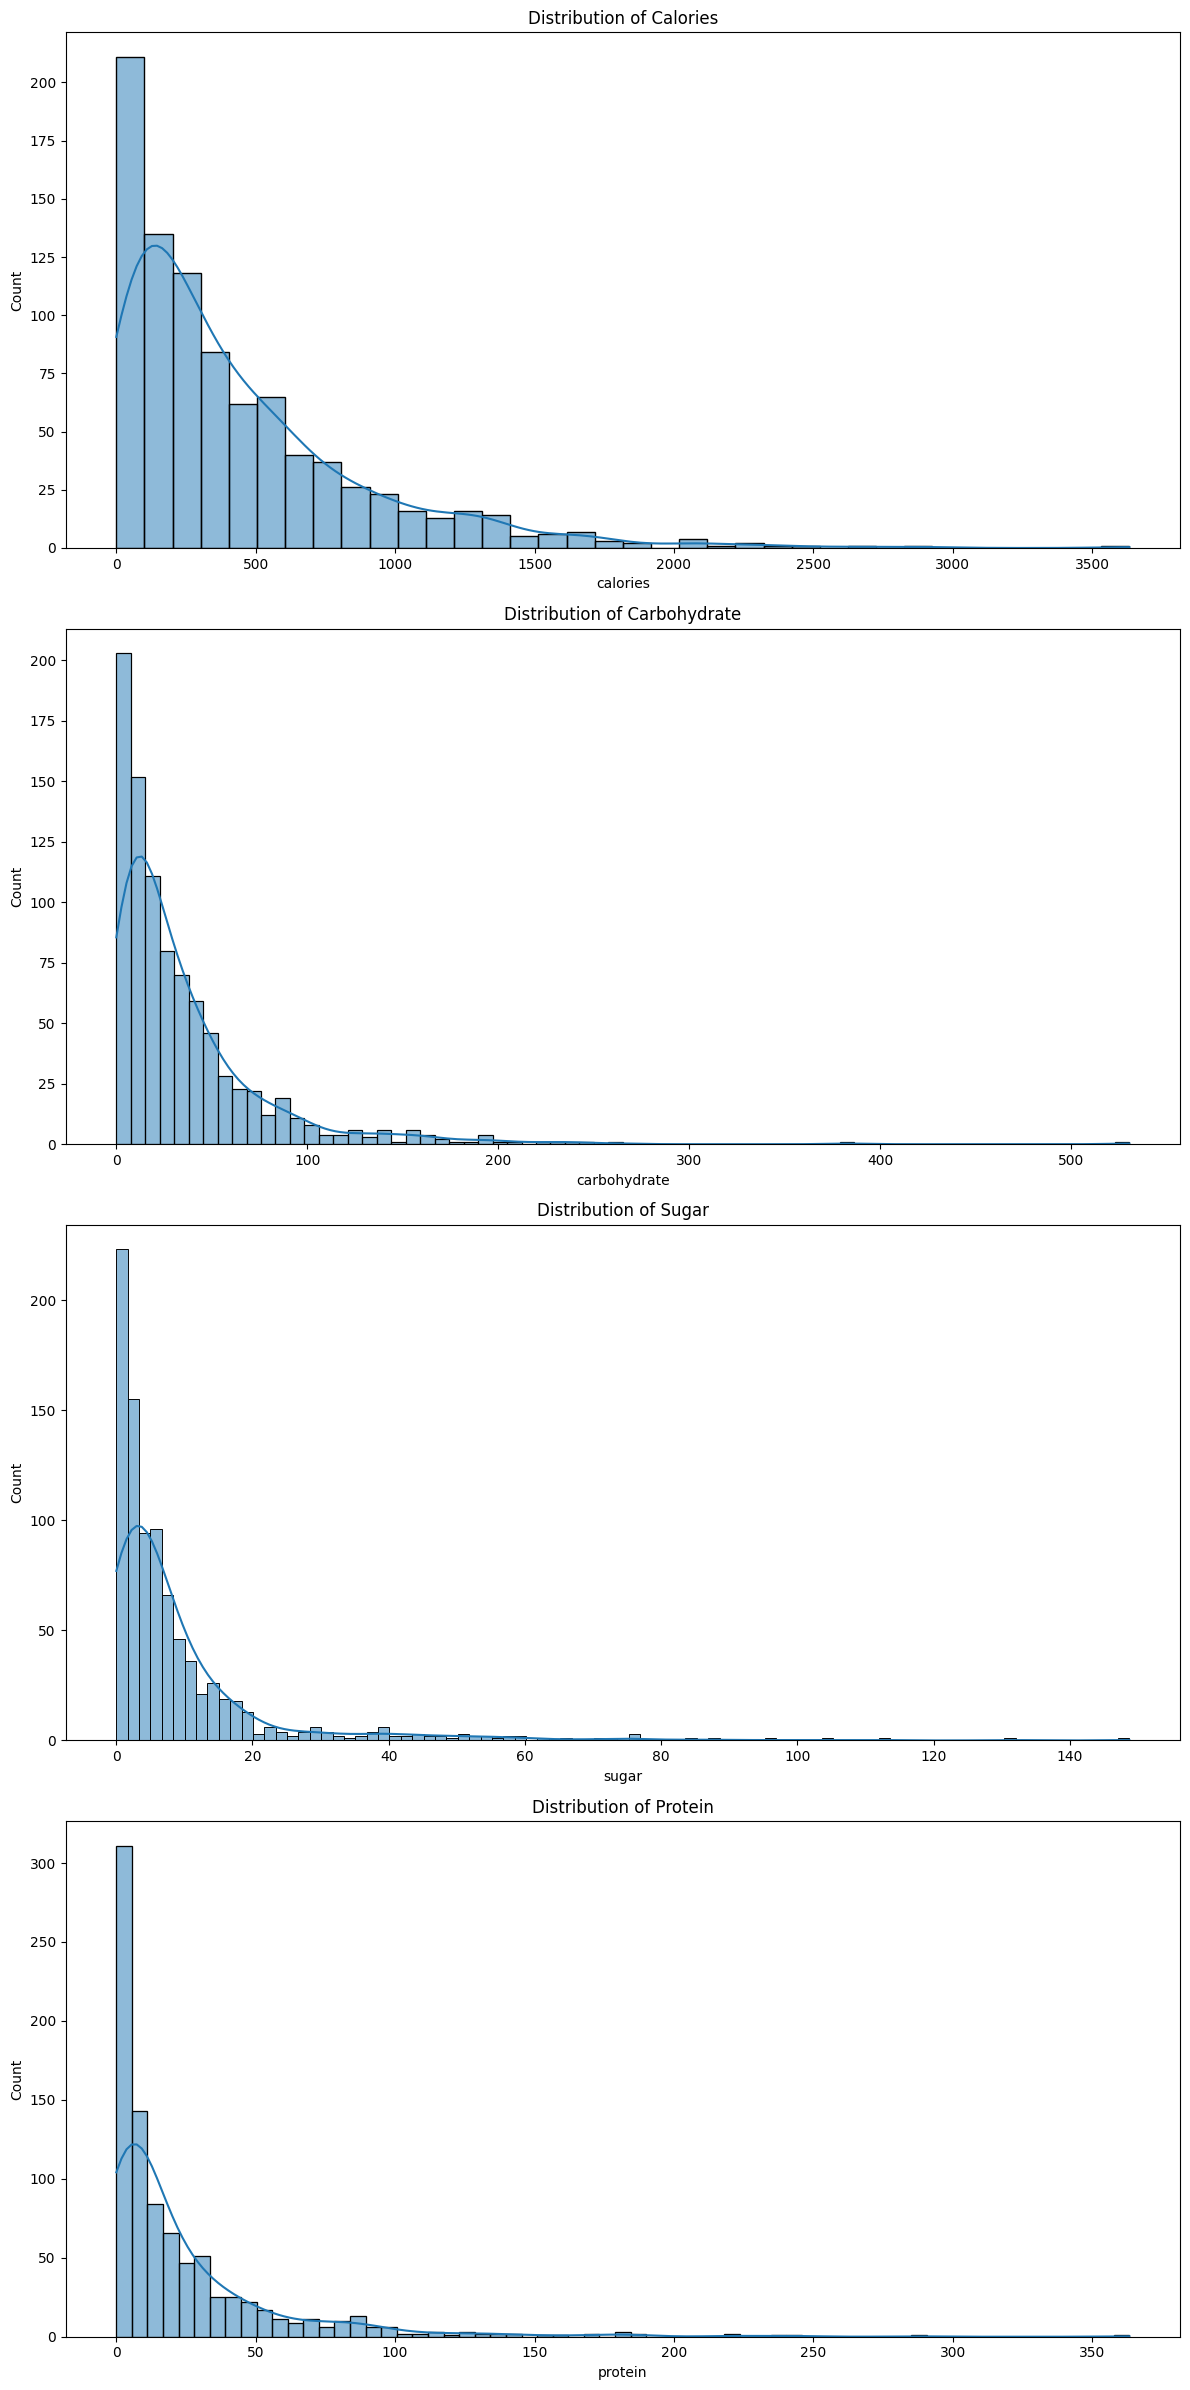

In [19]:
#specifying the numerical columns to plot
numerical_columns =  recipe_df.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=recipe_df, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

Kernel Density Estimation (KDE) in the shape of smooth curve illustrates the underlying data distribution.

Upon observation, it becomes evident that the dataset predominantly consists of lower values concerning the calorie and nutritional components of foods or beverages. The histograms validate that all numerical columns display a right-skewed distribution.

Box plots are deployed in the following steps to illustrate further data distribution and display presence of any outliers. 

# Detecting and Handling Outliers

<Axes: xlabel='high_traffic', ylabel='servings'>

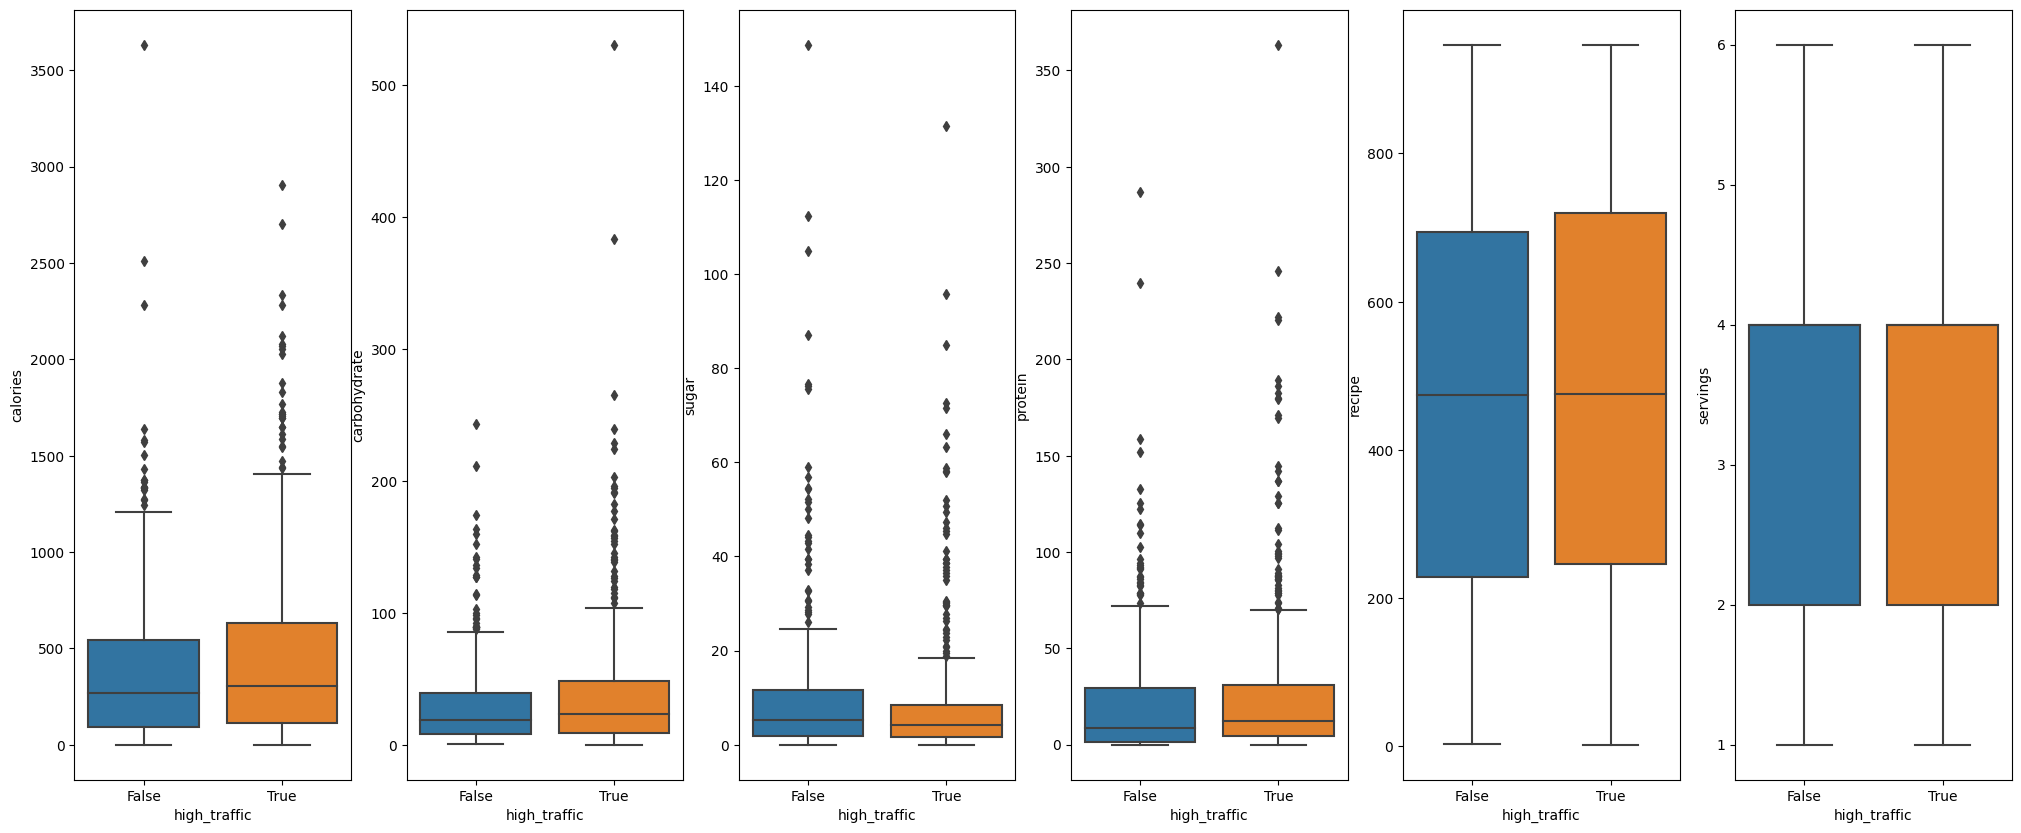

In [20]:
fig, ax = plt.subplots(1, 6, figsize=(25,10))
sns.boxplot(data=recipe_df, ax=ax[0], x="high_traffic", y="calories")
sns.boxplot(data=recipe_df, ax=ax[1], x="high_traffic", y="carbohydrate")
sns.boxplot(data=recipe_df, ax=ax[2], x="high_traffic", y="sugar")
sns.boxplot(data=recipe_df, ax=ax[3], x="high_traffic", y="protein")
sns.boxplot(data=recipe_df, ax=ax[4], x="high_traffic", y="recipe")
sns.boxplot(data=recipe_df, ax=ax[5], x="high_traffic", y="servings")

Boxplots confirm presence of outliers in calories, carbohydrate, sugar and protein columns

Outliers will need to be removed for building machine learning model, which will be done in the next steps.
Interquartile Range (IQR) will be computed for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.

In [22]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #calculate IQR
    iqr = q3 - q1
    
    #calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

In [23]:
#select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_df[column])
    outlier_limits[column] = (lower_limit, upper_limit)

#check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48
--------------------------------
Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001
--------------------------------
Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003
--------------------------------
Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001
--------------------------------


As per above function output, the high range value require processing, which will need to be either removed or transformed. 
Data removal will likely impact on model accuracy and may cause bias in the prediction resutls. As such it is always better to retain the data and try transform it to keep within the range of the plots. 

Couple of transformation methods are available to tackle outliers in the datasets, which are Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation. 
Yeo-Johnson Transformation has been found to be most effective method and will be put forward in transforming outliers of the dataframe since it better addresses 0 values comparing to other techniques. 

In [24]:
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize

#specifying the numerical columns to plot
numerical_columns =  recipe_df.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = recipe_df.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    
    #transformed_data = transformed_data[transformed_data[column] <= upper_limit]           # Removing Outliers
    #transformed_data[column] = transformed_data[column].clip(upper=upper_limit)            # Capping Outliers
    #transformed_data[column] = winsorize(transformed_data[column], limits=[0.05, 0.05])    # Winsorization
    
    #transformed_data[column] = np.log1p(transformed_data[column])                          # Logarithmic Transformation
    #transformed_data[column] = np.sqrt(transformed_data[column])                           # Square Root Transformation
    
    #transformed_data.loc[transformed_data[column] == 0, column] = 0.00001
    #transformed_data[column] = boxcox(transformed_data[column])[0]                         # Box-Cox Transformation
    
    transformed_data[column] = yeojohnson(transformed_data[column])[0]                      # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.742713,4.409023,0.481476,0.653469,Potato,4,True
1,3,17.437755,4.550612,1.224094,1.360783,Breakfast,1,False
2,4,8.416476,4.091120,2.587147,0.019804,Beverages,4,True
3,5,5.133412,1.101661,0.553884,0.425754,Beverages,4,False
4,6,16.024490,1.607528,0.883720,4.049462,One Dish Meal,2,True


<Axes: xlabel='high_traffic', ylabel='protein'>

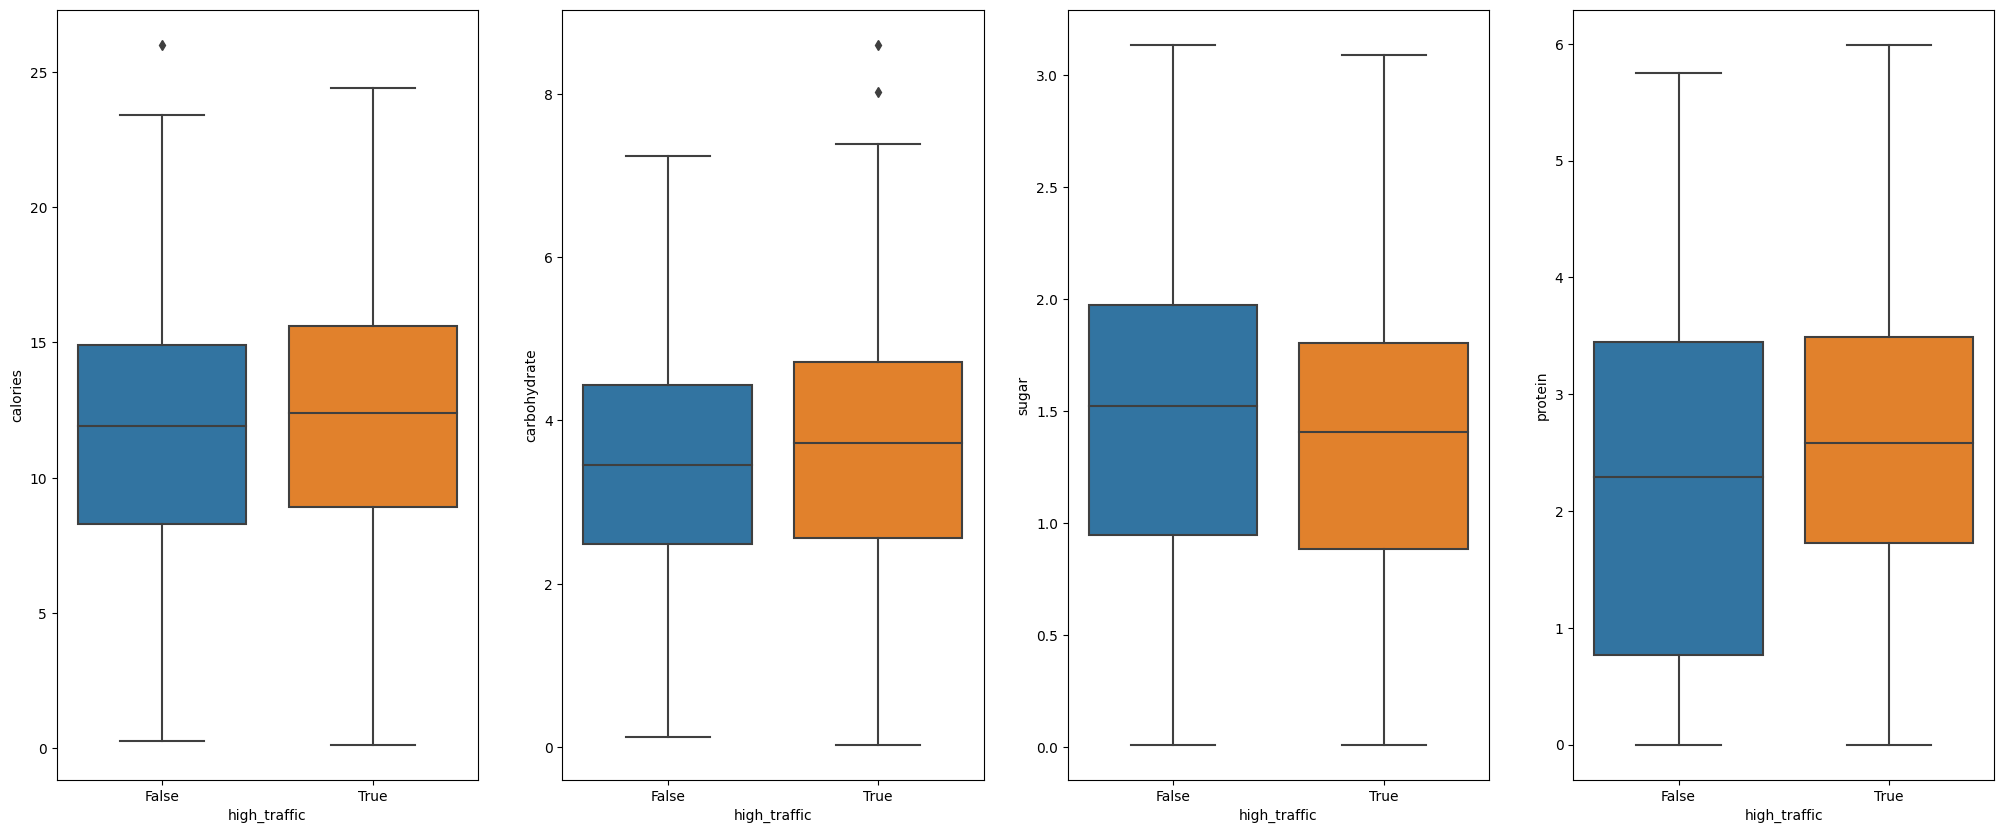

In [25]:
# re-plotting boxplots to confirm that outliers are no longer present 

fig, ax = plt.subplots(1, 4, figsize=(25,10))
sns.boxplot(data=transformed_data, ax=ax[0], x="high_traffic", y="calories")
sns.boxplot(data=transformed_data, ax=ax[1], x="high_traffic", y="carbohydrate")
sns.boxplot(data=transformed_data, ax=ax[2], x="high_traffic", y="sugar")
sns.boxplot(data=transformed_data, ax=ax[3], x="high_traffic", y="protein")

# Relationship between category and high_traffic features

Now that the outliers have been handeled, we will assess relationship between category and high_traffic columns to assess which recipe has higher traffic rate. 

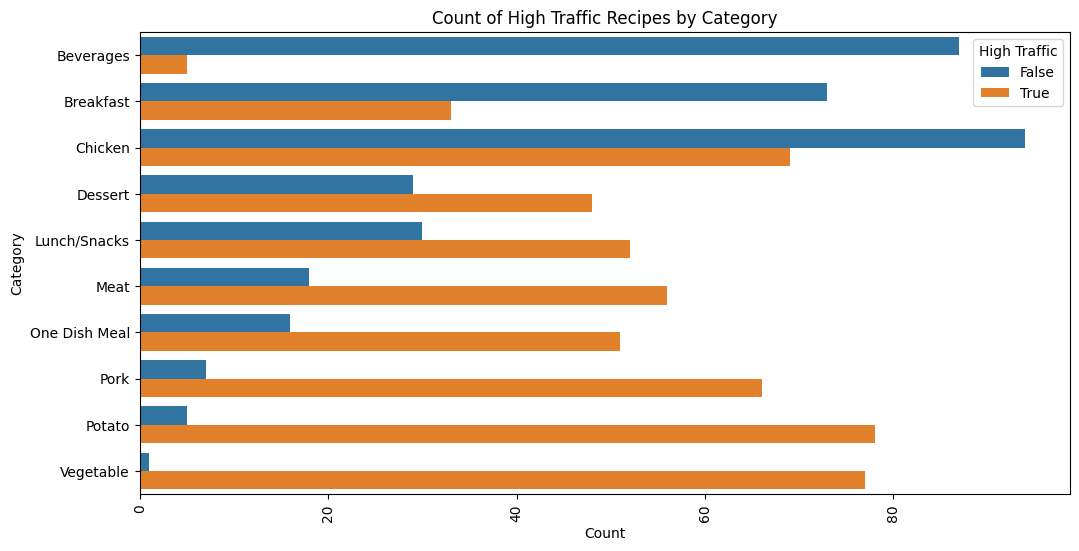

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(y="category", hue="high_traffic", data=transformed_data)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Category")

#set title
plt.title("Count of High Traffic Recipes by Category")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

It is evident that recipes in certain categories leads to increased traffic.
The top three categories in terms of high traffic are "Vegetable," "Potato," and "Pork." On the other hand, the "Beverages" category appears to have the lowest traffic impact.

# Numerical data distribution after handling the outliers

It is evident that distribution of numberical data has changed from right-skewed distribution to normal distribution.

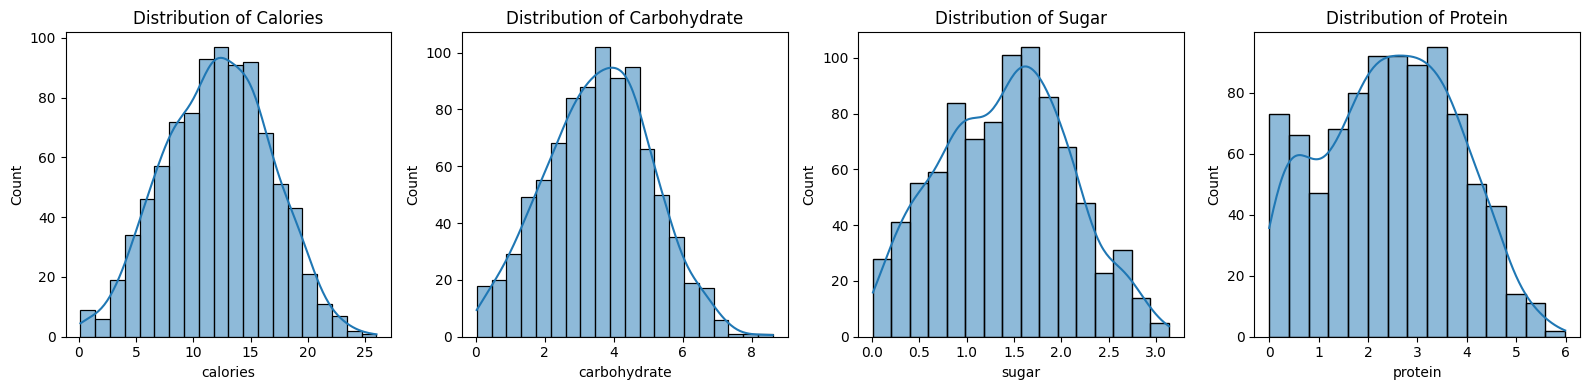

In [27]:
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

# Model Fitting & Evaluation

High traffic status is the target variable that we need to predict to acertain which recipe will have 80% of success. Therefore, binary classification model in machine learning will need to be constructed to be able to predict status of the high traffic. 

I am choosing Logistic Regression as baseline model since it does not assume any specific correlation structure among features, so it can work well even when correlations are weak. The comparison model I am choosing is the Random Forests since it can handle weakly correlated features well, as they combine multiple decision trees to improve performance and reduce overfitting.

For the evaluation, I am choosing Accuracy (the ratio of correctly predicted instances to the total instances), Precision (the ratio of correctly predicted positive observations to the total predicted positives), Recall (the ratio of correctly predicted positive observations to the all observations in the actual class), F1 Score (provides a balance between precision and recall). I will also print Confusion Matrix to describe the performance of a classification model by showing the true positives, true negatives, false positives, and false negatives.

# Prepare Data for Modelling

To enable modelling, we will need to convert the categorical variables into numeric features and split the data into a training set and a test set.

In [28]:
#performing one-hot encoding on the category column
encoded_categories = pd.get_dummies(recipe_df["category"], dtype=int)

#concatenate the encoded categories with the original dataframe
recipe_df_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
recipe_df_encoded = recipe_df_encoded.drop("category", axis=1)
recipe_df_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0


Now that the dataset is ready to start building machine learning models, we need to split the data into features (X) and the target variable (y), where the target variable is the "high_traffic" column.
Train_test_split function from the scikit-learn library will be used to split training and test dataset from which  point we can start development of both the baseline model and comparison model.
We will then fit the chosen model on the training data and employ it to predict the outcomes on the testing data.

In [29]:
feature_cols = ['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken',
               'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
X = recipe_df_encoded[feature_cols] # Features
y = recipe_df_encoded['high_traffic'] # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1_score of logistic regression classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.77
Precision of logistic regression classifier on test set: 0.79
Recall of logistic regression classifier on test set: 0.84
F1_score of logistic regression classifier on test set: 0.81
Confusion matrix:
[[ 75  36]
 [ 26 132]]


In [34]:
# Get the coefficients and feature importance
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

print("Feature Importance using Coefficients:")
print(feature_importance)

Feature Importance using Coefficients:
          Feature  Importance
15      Vegetable    1.268433
6       Beverages    1.128577
7       Breakfast    0.502178
14         Potato    0.455212
13           Pork    0.450635
8         Chicken    0.350725
12  One Dish Meal    0.122698
4         protein    0.103109
11           Meat    0.094854
2    carbohydrate    0.068344
9         Dessert    0.049094
1        calories    0.041820
10   Lunch/Snacks    0.035459
3           sugar    0.032242
5        servings    0.018614
0          recipe    0.015218


Feature importance in Logistic Regression model was computed based on the magnitude of the coefficients, which indicates the importance of the corresponding features. It is evident that Vegetable, Beverages and Breakfast are features that have biggest impact on the model performance. Pork and Potato are also top of the list in terms of feature imporatnce, which has been shown previously in relationship graph between high traffic and category columns. 

# Random Forest

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred1 = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred1)))
print('Precision of Random Forest classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred1)))
print('Recall of Random Forest classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred1)))
print('F1_score of Random Forest classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred1)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred1))

Accuracy of Random Forest classifier on test set: 0.72
Precision of Random Forest classifier on test set: 0.74
Recall of Random Forest classifier on test set: 0.83
F1_score of Random Forest classifier on test set: 0.78
Confusion matrix:
[[ 64  47]
 [ 27 131]]


In [37]:
# Get feature importances
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance using Random Forest:")
print(feature_importance_df)

Feature Importance using Random Forest:
          Feature  Importance
4         protein    0.148391
3           sugar    0.123979
1        calories    0.121146
0          recipe    0.119123
2    carbohydrate    0.117216
6       Beverages    0.116680
7       Breakfast    0.057790
5        servings    0.044088
15      Vegetable    0.043812
8         Chicken    0.030509
14         Potato    0.021283
13           Pork    0.020307
12  One Dish Meal    0.009096
11           Meat    0.009042
10   Lunch/Snacks    0.008947
9         Dessert    0.008589


Feature importance for a Random Forest can be evaluated using the built-in feature_importances_ attribute of the trained model. This attribute provides the importance of each feature based on the decrease in impurity (Gini impurity or entropy) brought by that feature across all trees in the forest.

The obtained results of feature importance is clearly different from the feature importance data in Logistic Regression meaning that models are likely to produce different prediction results on recipes with high traffic. 

# Comparison of models performance

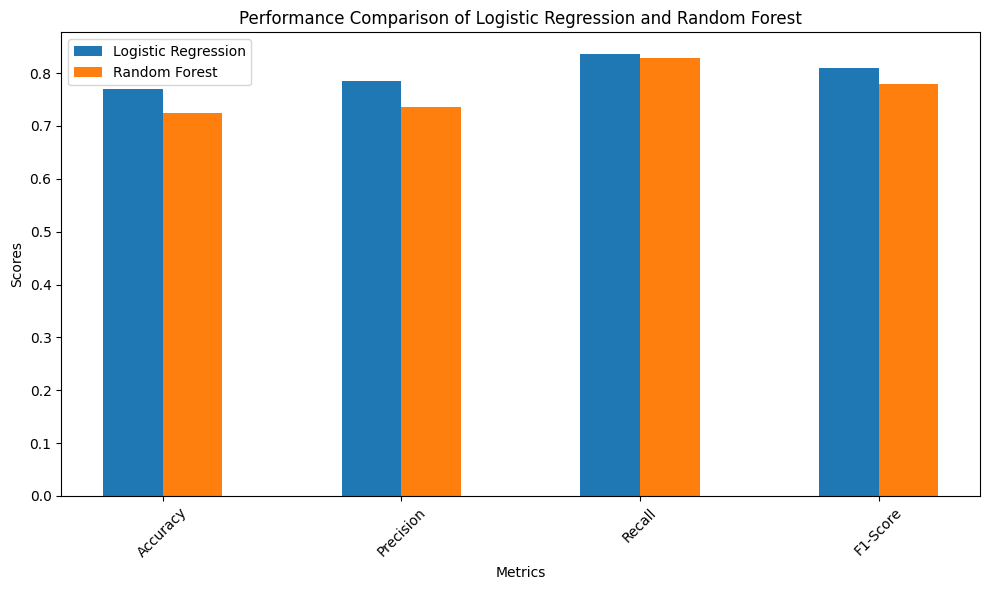

In [38]:
# Plotting bar chart to show comparison of performance of both models based on evaluation metrics. 

# Calculate evaluation metrics for each model

# Logistic Regression metrics 
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

# Random Forest metrics 
rf_accuracy = accuracy_score(y_test, y_pred1)
rf_precision = precision_score(y_test, y_pred1)
rf_recall = recall_score(y_test, y_pred1)
rf_f1 = f1_score(y_test, y_pred1)

#Build lists of metrics 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_metrics, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Logistic Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

fig.tight_layout()

plt.show()

# Results

It is evident that the logistic regression model performs better than Random Forest based on all evaluation metrics. It does mean Random Forest appears to be less favorable model to choose for prediction of recipes with high traffic. 

Given that the objective is to achieve an 80% accuracy in predicting high traffic recipes, it's essential to examine the F1_score for both models. F1_score is balanced measure of model's precision and recall scores. 
Since precision score suggests that model caputres positive instances correctly and recall score indicates that model is effective in capturing positive instances from the dataset, the balanced approached of both scores would produce average performance indication of the model. 

F1_Score for Logistic Regression is 84%, which is higher than Random Forest with 83% meaning that deploying Logistics Regression should produce results, which will be alighned with the goal of correctly predicting high traffic recipes 80% of the time.

# Evaluate by Business Criteria

The company wants to Correctly predict high traffic recipes 80% of the time, which really means that we want to achieve good levels of Traffic rate, Customer Satisfaction and Operational Efficiency. These KPIs can be derived from confusion matrix of both machine learning models. The threshold for traffic_rate is recommended to be minimum of 4 and other key business KPIs are recommended to be at 75-80%. 

__Traffic Rate__
- Traffic rate KPI is defined by dividing True Positives (popular recipes correctly classified as with high traffic) by False Positives (unpopular recipes mistakenly classified as with high traffic) within the confusion matrix. This KPI can serve as a valuable metric for our business model, providing insights into the accuracy of high traffic predictions.

__Customer Satisfaction (Precision & Recall)__:
- High Precision: Minimizes false positives (low traffic recipes identified as high traffic), which can lead to customer disappointment if recommended.
- High Recall: Ensures high traffic recipes are correctly identified and recommended, enhancing customer satisfaction

__Operational Efficiency (F1 Score)__:
- Balancing precision and recall can optimize resource allocation in recommending or featuring recipes, ensuring high traffic ones are highlighted without overwhelming users with low traffic ones.

# Business KPIs - Logistic Regression

In [39]:
# Define the confusion matrix
confusion_matrix = np.array([[75, 36], 
                             [26, 132]])

# Extract the values from the confusion matrix
TN, FP, FN, TP = confusion_matrix.ravel()

# Calculate Traffic_rate as business KPI
Traffic_rate = TP / FP

print('Traffic_rate: {:.0f}'.format(Traffic_rate))
print('Customer Satisfaction (Precision): {:.2f}'.format(precision_score(y_test, y_pred)))
print('Customer Satisfaction (Recall): {:.2f}'.format(recall_score(y_test, y_pred)))
print('Operational Efficiency (F1_Score): {:.2f}'.format(f1_score(y_test, y_pred)))

Traffic_rate: 4
Customer Satisfaction (Precision): 0.79
Customer Satisfaction (Recall): 0.84
Operational Efficiency (F1_Score): 0.81


# Business KPIs - Random Forrest

In [40]:
# Define the confusion matrix
confusion_matrix = np.array([[64, 47], 
                             [27, 131]])

# Extract the values from the confusion matrix
TN, FP, FN, TP = confusion_matrix.ravel()

# Calculate Traffic_rate as business KPI
Traffic_rate1 = TP / FP

print('Traffic_rate: {:.0f}'.format(Traffic_rate1))
print('Customer Satisfaction (Precision): {:.2f}'.format(precision_score(y_test, y_pred1)))
print('Customer Satisfaction (Recall): {:.2f}'.format(recall_score(y_test, y_pred1)))
print('Operational Efficiency (F1_Score): {:.2f}'.format(f1_score(y_test, y_pred1)))

Traffic_rate: 3
Customer Satisfaction (Precision): 0.74
Customer Satisfaction (Recall): 0.83
Operational Efficiency (F1_Score): 0.78


# Recommendations

The logistic regression model demonstrates robust performance in predicting high and low traffic recipes based on model performance metrics and Business KPIs. By implementing below recommended strategies, the model’s accuracy, precision, and recall can be further enhanced, leading to improved user satisfaction and engagement.

Based on the performance metrics, the following recommendations are made to improve the prediction and business outcomes:

- Enhance Feature Engineering: Incorporate additional features such as user ratings, ingredient complexity, and cooking time to improve the model’s precision and recall.

- Balanced Training Data: Ensure the training dataset is balanced to mitigate any bias towards high or low traffic recipes.

- Regular Model Updates: Continuously update the model with new data to adapt to changing user preferences and trends in recipe popularity.

- User Feedback Integration: Incorporate user feedback to refine predictions and improve the model’s ability to distinguish between high and low traffic recipes.

- Threshold Optimization: Fine-tune the decision threshold to balance precision and recall based on business priorities, such as maximizing user engagement or maintaining high-quality content.

- A/B Testing: Implement A/B testing for recommendations to evaluate the impact of the model on user engagement and satisfaction, and adjust the model accordingly.

# End of Notebook